# Installation

In [ ]:
HOME = '/kaggle/working'
%cd $HOME

!git clone https://github.com/wenquanlu/HandRefiner/
%cd HandRefiner
!git clone --recursive https://github.com/microsoft/MeshGraphormer.git
%cd MeshGraphormer
!pip install ./manopth/.
!mkdir -p models
!cp ../scripts/download_models.sh scripts/download_models.sh
!cp ../scripts/_gcnn.py src/modeling/_gcnn.py
!cp ../scripts/_mano.py src/modeling/_mano.py
!cp ../scripts/config.py src/modeling/data/config.py
!bash scripts/download_models.sh

import fileinput
import os
from os import path

%cd $HOME/HandRefiner/MeshGraphormer/src/modeling/data
if not path.exists(f'{HOME}/HandRefiner/MeshGraphormer/src/modeling/data/MANO_RIGHT.pkl'):
    get_ipython().system('wget -O MANO_RIGHT.pkl https://github.com/huchenlei/HandRefinerPortable/raw/master/mesh_graphormer/modeling/data/MANO_RIGHT.pkl')
if not path.exists(f'{HOME}/HandRefiner/MeshGraphormer/src/modeling/data/MANO_LEFT.pkl'):
    get_ipython().system('wget -O MANO_LEFT.pkl https://github.com/huchenlei/HandRefinerPortable/raw/master/mesh_graphormer/modeling/data/MANO_LEFT.pkl')    
%cd $HOME/HandRefiner
%cd preprocessor
if not path.exists(f'{HOME}/HandRefiner/preprocessor/hand_landmarker.task'):
    get_ipython().system('wget https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task')
    
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)
    
config_file = find('config.py', f'{HOME}/HandRefiner')
print('modifying file ' + str(config_file))
for line in fileinput.input(config_file, inplace=True):
    if ('handrefiner_root=""' in line):
        line = line.replace('handrefiner_root=""', f'handrefiner_root="{HOME}/HandRefiner"')
    print(line, end='')
    
!mkdir $HOME/HandRefiner/models
%cd $HOME/HandRefiner/models
!pip install gdown
if not path.exists(f'{HOME}/HandRefiner/models/inpaint_depth_control.ckpt'):
    get_ipython().system('gdown "https://drive.google.com/u/1/uc?id=1eD2Lnfk0KZols68mVahcVfNx3GnYdHxo&confirm=t"')
    
%cd $HOME/HandRefiner
!pip install -r requirements.txt
!pip install pytorch-lightning==1.8.3.post0
!pip uninstall torchmetrics -y
!pip install torchmetrics==0.7.0
!pip install embreex

%cd $HOME/HandRefiner/MeshGraphormer/src/modeling/bert
!cp ../../../transformers/pytorch_transformers/file_utils.py .
!cp ../../../transformers/pytorch_transformers/modeling_bert.py .
!cp ../../../transformers/pytorch_transformers/modeling_utils.py .
!ls -la /kaggle/working/HandRefiner/MeshGraphormer/src/modeling/bert/
!mamba install openssh -y

import datetime, random, os
from IPython.display import display, Image as DisplayImage
from PIL import Image
from os import path

def scale_image(input_path):
    # Open the image
    original_image = Image.open(input_path)

    # Check if the image size is already 512x512
    if original_image.size == (512, 512):
        print("Image is already 512x512 pixels. No scaling needed.")
        return input_path

    # Resize the image to 512x512
    scaled_image = original_image.resize((512, 512))

    # Create the output path for the scaled image
    output_path = "/kaggle/working/HandRefiner/test/"+ f"s_{os.path.basename(input_path)}"

    # Save the scaled image
    scaled_image.save(output_path)

    print(f"Image scaled to 512x512 and saved to: {output_path}")
    return output_path

# Download the inpaint model

Run this step to download the inpaint model to the /kaggle/working/HandRefiner/models folder.

In case the models folder is empty after this step, please manually upload the model using the web Files Browser, which can be installed and started in the blocks at the bottom of this notebook.
The model can be found here: https://drive.google.com/file/d/1eD2Lnfk0KZols68mVahcVfNx3GnYdHxo/view?usp=sharing

In [ ]:
%cd $HOME/HandRefiner/models
if not path.exists(f'{HOME}/HandRefiner/models/inpaint_depth_control.ckpt'):
    get_ipython().system('gdown "https://drive.google.com/u/1/uc?id=1eD2Lnfk0KZols68mVahcVfNx3GnYdHxo&confirm=t"')
if not path.exists(f'{HOME}/HandRefiner/models/inpaint_depth_control.ckpt'):
    get_ipython().system('wget "https://j2q5.c17.e2-1.dev/download/pogscafe/inpaint_depth_control.ckpt"')

# Run HandRefiner

/kaggle/working/HandRefiner
mkdir: cannot create directory '/kaggle/working/HandRefiner/output': File exists
Image is already 512x512 pixels. No scaling needed.
Image is already 512x512 pixels. No scaling needed.
python handrefiner.py    --prompt_file prompts.json    --input_dir "/"    --seed 17    --out_dir "/kaggle/working/HandRefiner/output/out_20240105-222310"    --strength 0.6    --weights "models/inpaint_depth_control.ckpt"    
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
No module 'xformers'. Proceeding without it.
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v1.10.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(
Contr

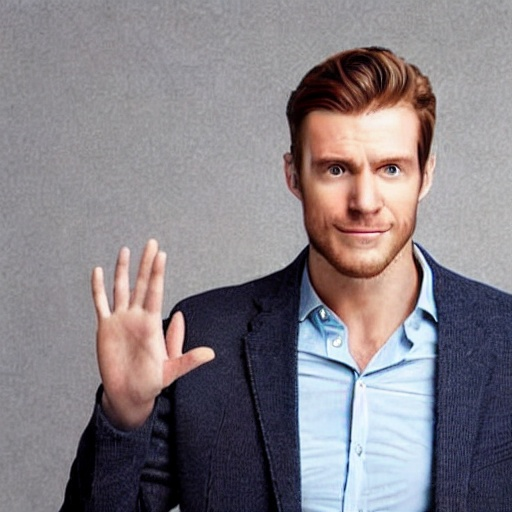

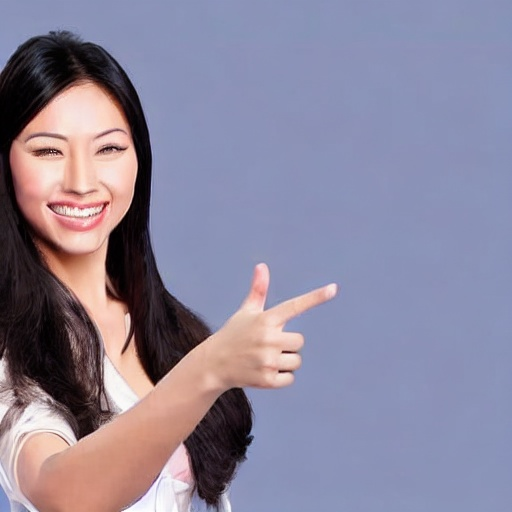

In [9]:
input_image_1 = "/kaggle/working/HandRefiner/test/2.jpg" #@param {type:"string"}
prompt_1 = "a woman facing the camera, making a hand gesture, indoor"#@param {type:"string"}

input_image_2 = "/kaggle/working/HandRefiner/test/3.jpg" #@param {type:"string"}
prompt_2 = "a man facing the camera, making a hand gesture, indoor" #@param {type:"string"}

input_image_3 = "" #@param {type:"string"}
prompt_3 = "" #@param {type:"string"}

input_image_4 = "" #@param {type:"string"}
prompt_4 = "" #@param {type:"string"}

input_image_5 = "" #@param {type:"string"}
prompt_5 = "" #@param {type:"string"}


strength = 0.6 #@param {type:"number"}

# If the seed is a negative number, it will be randomly generated.
seed = 17 #@param {type:"integer"}

# If output_folder is empty, the base output folder will be set to /content/HandRefiner/output and the subfolder name will be randomly generated.
output_folder = "" #@param {type:"string"}

# Change the model_path value if you downloaded the model to a different location
model_path = "models/inpaint_depth_control.ckpt" #@param {type:"string"}

if seed < 0:
  seed = random.randint(0, 4294967295)

%cd $HOME/HandRefiner
!mkdir $HOME/HandRefiner/output

# Create the json file with input images and prompts
with open('prompts.json', 'w') as file:
    lines = []
    if not input_image_1 == "":
        input_image_1 = scale_image(input_image_1)
        lines.append(f'{{"img": "{input_image_1}", "txt": "{prompt_1}"}}\n')
    if not input_image_2 == "":
        input_image_2 = scale_image(input_image_2)
        lines.append(f'{{"img": "{input_image_2}", "txt": "{prompt_2}"}}\n')
    if not input_image_3 == "":
        input_image_3 = scale_image(input_image_3)
        lines.append(f'{{"img": "{input_image_3}", "txt": "{prompt_3}"}}\n')
    if not input_image_4 == "":
        input_image_4 = scale_image(input_image_4)
        lines.append(f'{{"img": "{input_image_4}", "txt": "{prompt_4}"}}\n')
    if not input_image_5 == "":
        input_image_5 = scale_image(input_image_5)
        lines.append(f'{{"img": "{input_image_5}", "txt": "{prompt_5}"}}\n')
    file.writelines(lines)

# Create the output folder
if output_folder == '':
    output_folder = f'out_{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}'
    output_path = f'{HOME}/HandRefiner/output/{output_folder}'
else:
    output_path = output_folder
!mkdir $output_path

# Generate the handrefiner command
cmd = f'''python handrefiner.py \
   --prompt_file prompts.json \
   --input_dir "/" \
   --seed {seed} \
   --out_dir "{output_path}" \
   --strength {strength} \
   --weights "{model_path}" \
   '''
print(cmd)

# Execute the command
get_ipython().system(cmd);

# Show all images in the output folder
%cd $output_path
for i in os.listdir(output_path):
    if (i.endswith(".jpg")):
        display(DisplayImage(filename=i, retina=True))


# Install FileBrowser

In [ ]:
%cd /kaggle/working
!mkdir filebrowser
%cd filebrowser
!wget https://github.com/filebrowser/filebrowser/releases/download/v2.27.0/linux-amd64-filebrowser.tar.gz
!tar xvfz linux-amd64-filebrowser.tar.gz

# Configure FileBrowser

In [ ]:
!chmod a+x /kaggle/working/filebrowser/filebrowser
!/kaggle/working/filebrowser/filebrowser config init 
!/kaggle/working/filebrowser/filebrowser config set --auth.method=noauth 

# Start FileBrowser

In [ ]:
# Starting with RemoteMoe

# Change to the directory you want to have as the root folder in File Browser
%cd /kaggle/working 

!mkdir  ~/.ssh/
!touch  ~/.ssh/known_hosts
!ssh-keyscan -t rsa remote.moe >> ~/.ssh/known_hosts
!rm /root/.ssh/id_rsa
!ssh-keygen -t rsa -b 4096 -f /root/.ssh/id_rsa -q -N ""
!/kaggle/working/filebrowser/filebrowser config set --auth.method=noauth > /dev/null
!/kaggle/working/filebrowser/filebrowser & ssh -R 80:127.0.0.1:8080 -o StrictHostKeyChecking=no -i /root/.ssh/id_rsa remote.moe 